<h1 id="tocheading">Проект: Анализ тарифов телеком компании</h1>
<div id="toc"></div>

## Цель проекта:
Изучить два тарифа "Смарт" и "Ультра" телеком компании "Мегалайн" на предмет их прибыльности. Основываясь на этих данных коммерческий департамент компании сможет скоректировать рекламный бюджет. Будем использовать выборку из 500 клиентов. Нужно проанализировать поведение клиентов за 2018 год и сделать заключение о прибыльности тариффов.

#### Для анализа мы будем использовать несколько датасетов, которые будут содержать следующию информацию:
1. Звонки клиентов (calls)
2. Интернет-сессии (internet)
3. Сообщения клиентов (messages)
4. Тариффы (tariffs)
5. Пользователи (users)


### План работы:
[ 1. Импортировать все нужные библиотеки и датасеты. Изучить всю общую информацию о датасетах.](#step1)

[ 2. Привести данные к нужному типу для последующего анализа. Подготовить данные к анализу. Проверить все датасеты на наличие пропусков и дубликатов с последующей обработкой.  Объясненить логику исправления найденных ошибок.](#step2)


[ 3. Описательные статистики и сравнение характеристик потребления двух тариффов.](#step3)


[ 4. Проверка гипотез касательно: 
а) различия величины средней выручки, которую приносят пользователи тарифов "Смарт" и "Ультра"
б) различия средней выручки пользователей из Москвы и регионов](#step4)

[ 5. Общий вывод на основе проведенного анализа](#step5)


## <a id="step1">1. Импорт нужных библиотек и датасетов. Изучить всю общую информацию о датасетах.</a>

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
from math import factorial
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None) 


calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')



In [45]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [46]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [47]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [48]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [49]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


## <a id="step2"> 2.  Подготовка данных к анализу</a>

##### Приведем наши данные к нужным типам

In [50]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['id'] = calls['id'].astype('int')

internet['session_date'] = pd.to_datetime(internet['session_date'])
internet['id'] = internet['id'].astype('int')

messages['message_date'] = pd.to_datetime(messages['message_date'])
messages['id'] = messages['id'].astype('int')

Приведение данных к нужному типу:

1. Привели данные столбцов с номерами id к целочисленному формату вместо текстового.
2. Переменную с датой и временем звонков, интеренет сессий и сообщений перевели из вещественного типа во временной тип datetime, чтобы потом с ними можно было работать как со временемыми переменными. 


##### Проверим данные на наличие ошибок

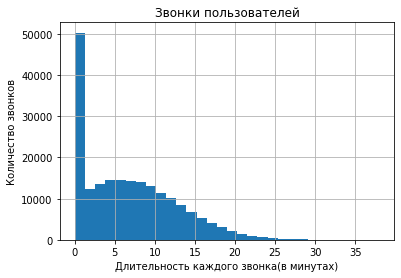

In [51]:
calls['duration'].hist(bins = 30)
plt.title('Звонки пользователей')
plt.xlabel('Длительность каждого звонка(в минутах)')
plt.ylabel('Количество звонков')
plt.show()

In [52]:
calls.describe()

,id,duration,user_id
count,"202,607.00","202,607.00","202,607.00"
mean,"1,212,254.17",6.76,"1,253.94"
std,"1,725,756.38",5.84,144.72
min,"10,000.00",0.00,"1,000.00"
25%,"1,012,286.50",1.30,"1,126.00"
50%,"1,179,376.00",6.00,"1,260.00"
75%,"1,358,125.50",10.70,"1,379.00"
max,"14,581,154.00",38.00,"1,499.00"


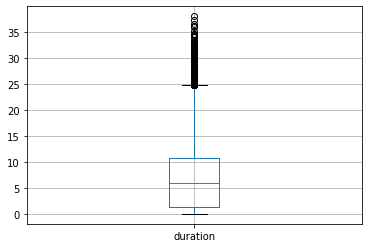

In [53]:
calls.boxplot(column = 'duration')
plt.show()

In [54]:
calls = calls.query('duration > 0 and duration < 25')

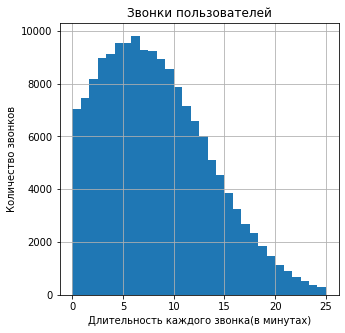

In [55]:
calls['duration'].hist(bins = 30, figsize = (5,5))
plt.title('Звонки пользователей')
plt.xlabel('Длительность каждого звонка(в минутах)')
plt.ylabel('Количество звонков')
plt.show()

1. При просмотре столбца со звонками обнаруживаем на гистограмме большое количество(около 50 000) звонков с длительностью 0 секунд. Вероятно это пропущенные вызовы. Т.к они не влияют на прибыльность и в то же время сдвигают описательные статистики вниз, мы убираем эти выбросы из наших данных.
2. На боксплоте и описательных статистиках замечаем наличие звонков длительных звонков более 25 минут(их всего 678 штук). Использовав правило трёх сигм мы можем прикинуть, что эти звонки выходят за пределы 99% всех значений характеристики. Поэтому мы принимаем решение удалить их.
2. После удаления "нулевых" звонков и тех, что превышают 25 минут, мы можем убедится, что среднее стало более сбалансированным (было 6.7 стало 8.3 мин), а отклонение уменьшилось с 5.84 до 5.22, что говорит о том, что данные стали менее разбросанными.
3. Гистограмма сразу приняла колоколовидную форму и отражает распределение Пуассона, т.е визуально сдвинута в сторону малых значений с пиком на значениях в районе 7-8 минут. 


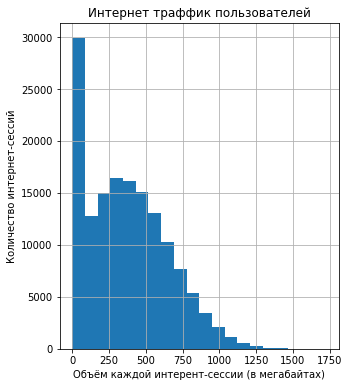

In [56]:
internet['mb_used'].hist(bins = 20, figsize = (5,6))
plt.title('Интернет траффик пользователей')
plt.xlabel('Объём каждой интерент-сессии (в мегабайтах)')
plt.ylabel('Количество интернет-сессий')
plt.show()

In [57]:
internet['mb_used'].describe()

count   149,396.00
mean        370.19
std         278.30
min           0.00
25%         138.19
50%         348.01
75%         559.55
max       1,724.83
Name: mb_used, dtype: float64

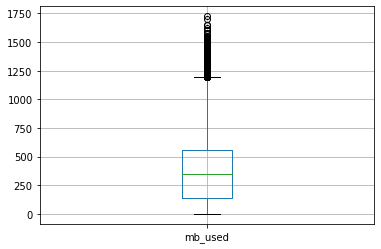

In [58]:
internet.boxplot(column = 'mb_used')
plt.show()

In [59]:
internet = internet.query('mb_used > 0 and mb_used < 1204')

In [60]:
internet.drop(axis = 1, columns ='Unnamed: 0')

,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,"1,052.81",2018-09-07,1000
2,10002,"1,197.26",2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000
...,...,...,...,...
149389,1499150,273.98,2018-11-20,1499
149390,1499151,752.72,2018-10-11,1499
149391,1499152,318.90,2018-10-03,1499
149392,1499153,490.13,2018-12-14,1499


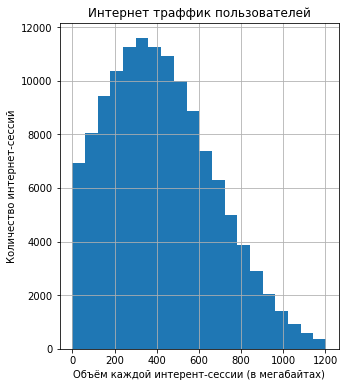

In [61]:
internet['mb_used'].hist(bins = 20, figsize = (5,6))
plt.title('Интернет траффик пользователей')
plt.xlabel('Объём каждой интерент-сессии (в мегабайтах)')
plt.ylabel('Количество интернет-сессий')
plt.show()

Интернет

1. Гистограмма отображает наличие достаточно большого количества сессий с использованным трафиком равным нулю. Это говорит о том, что была попытка начать сессию, но по какой-то причине трафик за эту сессию использован не был. В силу того, что мы в первую очередь заинтересованы в расчете использованного трафика, который влияет на конечную стоимость услуг, мы принимаем решение избавиться от этих "нулевых" сессий, которых в общей сложности набралось 19598.
2. Как мы можем заметить из описательных статистик и боксплота выбросы более 1205 являются выбросами (477 наблюдений), т.к выходят за пределы 99% всех значений и визуально находятся за пределами верхнего уса боксплота. 
3. После удаления выбросов, мы можем заметить, что среднее выросло с 370 до 422 (отсутствие нулей сказывается), а стандартное отклонение уменьшилось с 278 до 250, что говорит о меньшей рассеяности данных.
4. Еще мы избавились от непонятного столбца Unnamed 0, который появился вероятно по ошибке при выгрузке данных. 

In [62]:
#Т.к оператор округляет минуты и мегабайты к большему значению, мы также округлим наши данные к более высокому значению.
calls['duration'] = calls['duration'].apply(np.ceil)
internet['mb_used'] = internet['mb_used'].apply(np.ceil)

In [63]:
internet['mb_used'].describe()

count   129,318.00
mean        423.32
std         250.33
min           1.00
25%         227.00
50%         400.00
75%         591.00
max       1,204.00
Name: mb_used, dtype: float64

In [64]:
print('\033[1m' + 'Краткие выводы по подготовке данных к анализу' + '\033[0m')

Краткие выводы по подготовке данных к анализу


1. Мы привели данные к нужным типам: столбцы id приняли целочисленный тип, в то время как временные характеристики звонков, инернет-сессий и сообщений приняля временной были переведены ко временному типу datetime.
2. Мы избавились от "нулевых" выбросов в звонках и интернет сессиях, а также убрали выбросы в больших значениях в тех же таблицах.

Теперь пришло время посчитать и вывести различные характеристики использования тарифов для каждого пользователя.

## <a id="step3"> 3. Характеристики использования двух тарифных планов</a>

##### Создаем таблицы по нужным колонкам из датасетов calls, internet, messages

In [65]:
# меняем название столбца с датой на date
calls['date'] = calls['call_date']
calls['month'] = pd.DatetimeIndex(calls['date']).month

In [66]:
# выделяем нужный срез по колонкам датасета calls, позже этот срез будет объединён с датасетами других характеристик
calls_grouped = calls.pivot_table(index  = ['user_id', 'month'], values = 'duration', aggfunc = np.sum)

calls_grouped = calls_grouped.reset_index()

# корректируем название столбца с длительностью звонков
calls_grouped.set_axis(['user_id', 'month', 'calls_duration'],axis = 'columns', inplace = True) 

In [67]:
# создаем столбец month, по которому, вместе с user_id мы будем группировать данные
internet['month'] = pd.DatetimeIndex(internet['session_date']).month

In [68]:
# выделяем нужный срез по колонкам датасета internet, позже этот срез будет объединён с датасетами других характеристик
internet_grouped = internet.pivot_table(index  = ['user_id', 'month'], values = 'mb_used', aggfunc = np.sum)

internet_grouped = internet_grouped.reset_index()

# задаем названия столбцов 
internet_grouped.set_axis(['user_id', 'month', 'mb_used'],axis = 'columns', inplace = True) 

In [69]:
messages['month'] = pd.DatetimeIndex(messages['message_date']).month

In [70]:
# выделяем нужный срез по колонкам датасета messages, позже этот срез будет объединён с датасетами других характеристик
messages_grouped = messages.pivot_table(index  = ['user_id', 'month'], values = 'id', aggfunc = "count")

messages_grouped = messages_grouped.reset_index()

# корректируем название столбца с количеством сообщений
messages_grouped.set_axis(['user_id', 'month', 'messages_count'],axis = 'columns', inplace = True)

In [71]:
calls_grouped.head()

,user_id,month,calls_duration
0,1000,5,159.00
1,1000,6,172.00
2,1000,7,340.00
3,1000,8,408.00
4,1000,9,466.00


In [72]:
# соединяем сначала таблицы со звонками и интернетом
calls_internet = calls_grouped.merge(internet_grouped, on = ['user_id', 'month'])

In [73]:
internet_grouped.head()

,user_id,month,mb_used
0,1000,5,"2,256.00"
1,1000,6,"23,257.00"
2,1000,7,"14,016.00"
3,1000,8,"14,070.00"
4,1000,9,"14,581.00"


In [74]:
# соединяем получившуюся таблицу с сообщениями
calls_internet_messages = calls_internet.merge(messages_grouped, on = ['user_id', 'month'])

In [75]:
messages_grouped.head()

,user_id,month,messages_count
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [76]:
# теперь у нас есть большая таблица, где есть все пользователи и все характеристики их потребления
# но у нас отсутствуют данные по тем тариффам, которые используют пользователи
calls_internet_messages.head()

,user_id,month,calls_duration,mb_used,messages_count
0,1000,5,159.00,"2,256.00",22
1,1000,6,172.00,"23,257.00",60
2,1000,7,340.00,"14,016.00",75
3,1000,8,408.00,"14,070.00",81
4,1000,9,466.00,"14,581.00",57


In [77]:
users_grouped = users[['user_id','tariff']]

In [78]:
# объединяем таблицу с юзерами и их тариффом со всеми характеристика потребления 
pivot_table = calls_internet_messages.merge(users_grouped, on = 'user_id')

In [79]:
tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute', 'tariff']

In [80]:
# объединим таблицы с характеристиками потребления сгруппированные по пользователю-тарифу-месяцу
# и тарифы с их описанием, что поможем нам вывести и посчитать израсходованные минуты/мб/сообщения
# и соотнести их с тарифными характеристиками для подсчета трат пользователей по двум тарифам
general_data = pd.merge(pivot_table, tariffs, on = 'tariff')

In [81]:
# полагаясь на визуальную помощь и статистики избавляемся от огромных выбросов в длительности звонков
general_data = general_data.query('calls_duration > 0 and calls_duration < 1300')

In [82]:
# используя визуальную помощь и правило трех сигм избавимся от больших выбросов в использованном трафике
general_data = general_data.query('mb_used < 38000')

In [83]:
# избавляемся от выбросов в сообщениях
general_data = general_data.query('messages_count < 140')

In [84]:
general_data.head()

,user_id,month,calls_duration,mb_used,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.00,"2,256.00",22,ultra,1000,30720,3000,1950,150,1,1
1,1000,6,172.00,"23,257.00",60,ultra,1000,30720,3000,1950,150,1,1
2,1000,7,340.00,"14,016.00",75,ultra,1000,30720,3000,1950,150,1,1
3,1000,8,408.00,"14,070.00",81,ultra,1000,30720,3000,1950,150,1,1
4,1000,9,466.00,"14,581.00",57,ultra,1000,30720,3000,1950,150,1,1


In [86]:
# использую функцию, которая по каждому пользователю подсчитывает минуты сверх тарифа
# потому мы перемножаем все эти минуты на стоимость каждой минуты сверх тарифа
# в итоге у нас есть столбец с суммой заплаченной за звонки сверх тарифа
def overused_minutes(row):
    minutes_included = row['minutes_included']
    minutes_used = row['calls_duration']
    rub_per_minute = row['rub_per_minute']
    if minutes_used > minutes_included:
        extra_fee_calls = (minutes_used - minutes_included)*rub_per_minute
    else:
        extra_fee_calls = 0
    return extra_fee_calls

general_data['extra_fee_calls'] = general_data.apply(overused_minutes, axis =1)  

In [87]:
# использую функцию, которая по каждому пользователю подсчитывает количество мегабайт сверх тарифа
# потому мы перемножаем все эти мегабайты на стоимость каждой минуты сверх тарифа
# и делим на тысячу, т.к в столбце стоимости перерасходованного трафика указаны гигабайты, а мы считали в мегабайтах
def overused_internet(row):
    internet_included = row['mb_per_month_included']
    internet_used = row['mb_used']
    rub_per_gb = row['rub_per_gb']
    if internet_used > internet_included:
        extra_fee_internet = ((internet_used - internet_included)*rub_per_gb)/1024
    else:
        extra_fee_internet = 0
    return extra_fee_internet

general_data['extra_fee_internet'] = general_data.apply(overused_internet, axis =1)  

In [88]:
def overused_messages(row):
    messages_included = row['messages_included']
    messages_used = row['messages_count']
    rub_per_message = row['rub_per_message']
    if messages_used > messages_included:
        extra_fee_messages = (messages_used - messages_included)*rub_per_message
    else:
        extra_fee_messages = 0
    return extra_fee_messages

general_data['extra_fee_messages'] = general_data.apply(overused_messages, axis =1)  

In [89]:
general_data['monthly_pay'] = general_data['rub_monthly_fee'] + general_data['extra_fee_calls'] + general_data['extra_fee_internet'] + general_data['extra_fee_messages']

 ## Cравнение двух тарифов 

In [90]:
# создаем отдельную выборку из 500 пользователей
sample_data = general_data.sample(500)

In [91]:
# создадим отдельный срез для тариффа "смарт"
smart = sample_data.query('tariff == "smart"')

In [92]:
# выберем среднее интересующих нас характеристик потребления тариффа "смарт"
smart_features = smart.pivot_table(index = 'tariff', values = ['calls_duration', 'mb_used', 'messages_count'], aggfunc = 'mean')

In [93]:
# создадим отдельный срез для тариффа "ультра"
ultra = sample_data.query('tariff == "ultra"')

In [94]:
# выберем среднее интересующих нас характеристик потребления тариффа "ультра"
ultra_features = ultra.pivot_table(index = 'tariff', values = ['calls_duration', 'mb_used', 'messages_count'], aggfunc = 'mean')

In [95]:
smart_features.reset_index()

,tariff,calls_duration,mb_used,messages_count
0,smart,416.30,"16,036.03",37.84


In [96]:
ultra_features.reset_index()

,tariff,calls_duration,mb_used,messages_count
0,ultra,512.94,"17,052.28",57.08


Помесячные средние характеристик потребления двух тарифных планов: 

1. По выборке пользователи тариффа "смарт" в среднем используют значительно меньшее количество минут на разговоры (в среднем на 22%), по сравнению с пользователями тариффа "ульра".Но ни те, ни другие в среднем не выходят за пределы предоплаченного количества минут.

2. Пользователи тариффа "ультра" используют на 11% больше интеренет траффика, чем "смартовцы". Это выглядит закономерно, т.к у них изначально включенно в траффик 30гб бесплатного Интернета и они платят за это в абонплате. При этом, пользователи "смарт" в среднем регулярно превышают заложенный в абонплате объем траффика, и соответственно переплачивают за дополнительные мегабайты.

3. Пользователи тариффа "смарт" отправляют сообщений примерно на 30% меньше, чем пользователи тариффа "ультра". И те, и другие в среднем не превышают заложенный в абонплате лимит.

4. Хотя изначально пользователи "смарт" не платят большую абонплату, вследствие перерасхода траффика они регулярно доплачивают за дополнительный траффик. 


Проверим среднюю прибыль пользователей двух тариффов по выборке 

In [97]:
result = sample_data.groupby('tariff')['monthly_pay'].mean()

result.reset_index()

,tariff,monthly_pay
0,smart,"1,190.78"
1,ultra,"1,960.50"


In [98]:
print('Средняя прибыль по всей выборке:')
sample_data['monthly_pay'].mean()

Средняя прибыль по всей выборке:


1395.52477734375

1. Как можем заметить, пользователи тариффа "ультра" в среднем платят сумму равную их ежемесячной плате. В силу того, что они практически не перерасходуют предоставляемые минуты, интернет и сообщения, они чаще всего платят сумму близкую к абонплате (1950 руб).
2. Пользователи "смарт" вследствие перерасхода предоставляемых в абонплате услуг(в основном интеренета, но и минут тоже), значительно переплачивают свою абонплату(550 руб) и тратят в среднем (1212 руб).
3. Как можем заключить из сравнения средней помесячной прибыли каждого пользователя, тарифф "ультра" является более прибыльным для компании по средней выручки на клиента. Но следует учитывать, что получают пользователи "ультра" гораздо больше траффика, минут и сообщений. В среднем один пользователь тариффа "смарт" каждый месяц приносит прибыли на 39% процентов меньше, чем пользователь тариффа "ультра" по выборке. 

In [99]:
print('Стандартные отклонения характеристик потребления:')
print()
print('Звонки пользователей тариффа "ультра":', ultra.calls_duration.std(ddof=1))
print('Звонки пользователей тариффа "смарт":', smart.calls_duration.std(ddof=1))
print()
print('Интернет пользователей тариффа "ультра":', ultra.mb_used.std(ddof=1))
print('Интернет пользователей тариффа "смарт":', smart.mb_used.std(ddof=1))
print()
print('Сообщения пользователей тариффа "ультра":', ultra.messages_count.std(ddof=1))
print('Сообщения пользователей тариффа "смарт":', smart.messages_count.std(ddof=1))

Стандартные отклонения характеристик потребления:

Звонки пользователей тариффа "ультра": 290.2183806648621
Звонки пользователей тариффа "смарт": 178.43428808348463

Интернет пользователей тариффа "ультра": 8149.203585695468
Интернет пользователей тариффа "смарт": 5853.46072119358

Сообщения пользователей тариффа "ультра": 39.19300438366404
Сообщения пользователей тариффа "смарт": 25.72745695484284


In [100]:
print('Дисперсия характеристик потребления:')
print()
print('Звонки пользователей тариффа "ультра":', ultra.calls_duration.var(ddof=1))
print('Звонки пользователей тариффа "смарт":', smart.calls_duration.var(ddof=1))
print()
print('Интернет пользователей тариффа "ультра":', ultra.mb_used.var(ddof=1))
print('Интернет пользователей тариффа "смарт":', smart.mb_used.var(ddof=1))
print()
print('Сообщения пользователей тариффа "ультра":', ultra.messages_count.var(ddof=1))
print('Сообщения пользователей тариффа "смарт":', smart.messages_count.std(ddof=1))

Дисперсия характеристик потребления:

Звонки пользователей тариффа "ультра": 84226.70847573479
Звонки пользователей тариффа "смарт": 31838.79516385998

Интернет пользователей тариффа "ультра": 66409519.08111188
Интернет пользователей тариффа "смарт": 34263002.41455606

Сообщения пользователей тариффа "ультра": 1536.0915926179086
Сообщения пользователей тариффа "смарт": 25.72745695484284


ГИСТОГРАММЫ РАСПРЕДЕЛЕНИЯ ХАРАКТЕРИСТИК ТАРИФФОВ В ВЫБОРКЕ

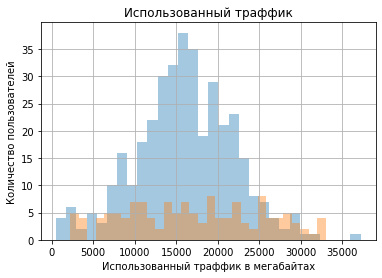

In [101]:
sample_data.query('tariff == "smart"')['mb_used'].hist(bins = 30, alpha = 0.4)
sample_data.query('tariff == "ultra"')['mb_used'].hist(bins = 30, alpha = 0.4)
plt.title('Использованный траффик')
plt.xlabel('Использованный траффик в мегабайтах')
plt.ylabel('Количество пользователей')
plt.show()

Как можем заметить из гистограммы, использованный траффик пользователей "смарт" в целом распределен нормально. В то время, как большинство значений пользователей тариффа "ультра" как-будто "размазались" вдоль оси x.  

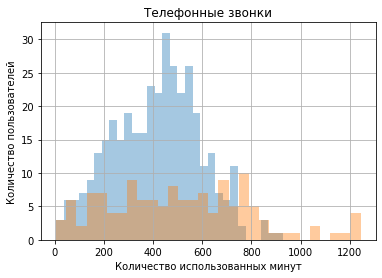

In [102]:
sample_data.query('tariff == "smart"')['calls_duration'].hist(bins = 30, alpha = 0.4)
sample_data.query('tariff == "ultra"')['calls_duration'].hist(bins = 30, alpha = 0.4)
plt.title('Телефонные звонки')
plt.xlabel('Количество использованных минут')
plt.ylabel('Количество пользователей')
plt.show()

Распределение звонков пользователей "смарт" во многом напоминает нормальное распределение с небольшим сдвигом в сторону больших значений. Распределение звонков пользователей тариффа "ультра" не похоже на нормальное и вместо колокола мы наблюдаем множество значений распределенных примерно равномерно вдоль оси х с небольшим подъемом в районе 450 - 550 минут

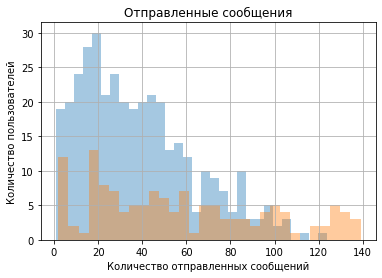

In [103]:
sample_data.query('tariff == "smart"')['messages_count'].hist(bins = 30, alpha = 0.4)
sample_data.query('tariff == "ultra"')['messages_count'].hist(bins = 30, alpha = 0.4)
plt.title('Отправленные сообщения')
plt.xlabel('Количество отправленных сообщений')
plt.ylabel('Количество пользователей')
plt.show()

Распределение сообщений пользователей тариффов "смарт" не является нормальным. Оно сдвинуто в сторону малых значений и напоминает распределение Пуассона. Распределение звонков также не напоминает нормальной распределение, а большей частью павномерно распределено вдоль оси х.

## <a id="step4">4. Проверка гипотез</a>

1. Для проверки наших гипотез о различии выручки от двух тариффных планов мы будем использовать случайную выборку 500 пользователей этих тариффов, которую мы взяли из общей совокупности наблюдений при помощи метода sample().
2. Итак, для начала нам нужно сравнить гипотезу о равенстве выручки пользователей двух тариффов. Для этого мы сначала используем нулевую гипотезу Н0, которая скептична и гласит, что выручки от двух тарифных планов не отличаются друг от друга.
3. Затем, мы вооружимся альтернативной гипотезой Н1, которая утверждает, что между выручкой пользователей тариффов "смарт" и "ультра" существует статистически значимое различие. Если при проведении статистического теста нам удастся опровергнуть нулевую гипотезу, то мы сможем утверждать, что нулевая гипотеза крайне маловероятна. И соответственно иметь основания для правильности альтернативной гипотезы.
4. Т.к пользователи двух тарифных планов принадлежат к двум независимым группам, мы будем использовать t-критерий для независимых выборок. 
5. Уровень значимости будет установлен на уровне 0.05, что говорит о том, что вероятность принять альтернативную гипотезу при правильности нулевой составляет 5%.  

In [104]:
ultra.monthly_pay.describe()

count     133.00
mean    1,960.50
std        54.60
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     2,285.60
Name: monthly_pay, dtype: float64

In [105]:
smart.monthly_pay.describe()

count     367.00
mean    1,190.78
std       771.29
min       550.00
25%       550.00
50%       916.00
75%     1,613.65
max     5,578.34
Name: monthly_pay, dtype: float64

In [106]:
# приводим данные к списку

smart_guys = smart['monthly_pay'].tolist()
ultra_guys = ultra['monthly_pay'].tolist()

# задаем уровень значимости
alpha = .05

# проводим t-тест для двух независимых выборок

results = st.ttest_ind(ultra_guys, smart_guys, equal_var = True)

print('p-значение:', results.pvalue)

p-значение: 2.850971666573846e-27


Итак, мы получили статистически значимые результаты с результатом p-значение = 2.416676717457731e-20 (очень маленькое число). Т.к наше изначально выбранный уровень значимость был установлен на отметке 0.05, это результат позволяет нам отвергнуть нулевую гипотезу (наш результат примерно выглядит как 0.00000000024). Или иными словами, вероятность ошибки первого рода составляет гораздо меньше одного процента, что меньше 5%, и соответственно вероятность отвергнуть нулевую гипотезу, хотя она была верна, составляет значительно меньше. 
Заключение: месячная выручка пользователей тариффов "смарт" и "ультра" статистически различается.

In [107]:
# для проверки второй гипотезы о различии выручки из регионов и Москвы создаем табличку с городом пользователей
users_city = users[['user_id','city']]

In [108]:
sample_data_city = sample_data.merge(users_city, on = 'user_id')

In [109]:
sample_data_city.head()

,user_id,month,calls_duration,mb_used,messages_count,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,extra_fee_calls,extra_fee_internet,extra_fee_messages,monthly_pay,city
0,1402,3,376.00,"19,036.00",27,ultra,1000,30720,3000,1950,150,1,1,0.00,0.00,0,"1,950.00",Пенза
1,1402,10,744.00,"18,349.00",35,ultra,1000,30720,3000,1950,150,1,1,0.00,0.00,0,"1,950.00",Пенза
2,1402,12,596.00,"26,298.00",22,ultra,1000,30720,3000,1950,150,1,1,0.00,0.00,0,"1,950.00",Пенза
3,1308,2,261.00,"13,579.00",21,smart,50,15360,500,550,200,3,3,0.00,0.00,0,550.00,Москва
4,1308,4,204.00,"16,919.00",24,smart,50,15360,500,550,200,3,3,0.00,304.49,0,854.49,Москва


In [110]:
sample_data_city_moscow = sample_data_city.query('city == "Москва"')

In [111]:
sample_data_city_regions = sample_data_city.query('city != "Москва"')

Аналогично предыдущему подходу, мы изучаем различие между двумя независимыми группами(выборками): пользоватей услуг компании из москвы и регионов. Для анализа двух независимых выборок мы применим t-тест для двух независимых выборок. При помощи сопоставления их средних мы попробуем выяснить различаются ли они между собой, и насколько системно это отличие, т.е неслучайно, а обусловлено влиянием фактора принадлежности москве или регионам. 

Уровень значимости будет установлен на уровне 0.05 как и в большинстве исследований в социальных дисциплинах.
Нулевая гипотеза Н0 гласит о том, что выручка двух групп пользователей - из москвы и регионов не отличается статистически. Вторая, альтернативная гипотеза Н1 говорит о том, что региональная и столичная выручки статистически отличаются.

In [112]:
capital_guys = sample_data_city_moscow['monthly_pay'].tolist()
regional_guys = sample_data_city_regions['monthly_pay'].tolist()

alpha = .05

results = st.ttest_ind(capital_guys, regional_guys, equal_var = True)

print('p-значение:', results.pvalue)

p-значение: 0.2716585210346853


Полученные результаты уровня значимости = 0.50576 говорят о невозможности отвергнуть нулевую гипотезу, т.к они значительно превышают порог 0.05, который мы задали перед началом эмрирической проверки нашей гипотезы. Соответственно мы можем заключить, что основания говорить о статистическом различии между прибылью столичных и региональных пользователей отсутствуют.  Иначе говоря, выручка пользователей из москвы и регионов не отличается статистически значимо. 

## <a id="step5"> 5. Общий вывод </a>

1. Общие характеристики потребления пользователей двух тариффов в чем-то схожи а в чем-то оличны. Пользователи тариффа "ультра" в целом на 11% больше используют трафика, чем пользователи тариффа "смарт". Количество использованных минут у пользователей "ультра" примерно на 20% выше. Помесячная прибыль пользователя "ультра" примерно на 35-40% выше прибыли пользователя "смарт". Но стоит учитывать, что пользователи "ультра" и получают изначально по абонплате гораздо большее количество минут, траффика и сообщений.    
2. На гистограмме мы можем заметить, что интернет и звонки у пользователей смарт распределены близко к нормальному распределению. В то же время, интернет и звонки у пользователей "ультра" распределены не нормально, а скорее "размазаны" вдоль оси х. Это указывает на большую рассеяность данных в звонках и интернете пользователей тариффа "ультра". Что касается распределения сообщений, то у "смартовцев" он напоминает Пуассоновское распределения, а у "ультра" также с большего равномерно рассеяно вдоль оси х.  
3. Пользователям тариффа "смарт" в среднем по выборке требуется 400 минут на звонки, 16 гб интернета и 39 сообщений. 
4. Пользователям тариффа "ультра" в среднем по выборке требуется 542 минуты на звонки, 17 гб интернета и 57 сообщений.
5. редняя помесячная плата пользователей "смарт" варьируется в районе 1200 руб, а "ультра" - 2000 руб. Это говорит о том, что пользователи тариффа "смарт" платят серьезную доплату за перерасход минут и интернета в дополнение к существующему тариффу.
6. При помощи проверки гипотезы удалось установить, что средняя выручка пользователей двух тариффов статистически различается на уровне значимости 0.05.
7. В то же время нам не удалось статистически подтвердить различие выручки пользователей из москвы и регионов. 